In [1]:
!pip install opendatasets

In [2]:
# import library to project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix ,f1_score ,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score , precision_score ,accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBClassifier

In [3]:
od.download("https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dfb
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset


100%|██████████| 18.3M/18.3M [00:00<00:00, 170MB/s]

In [4]:
# information the lung cancer
# show the first 5 row

datacan = pd.read_csv("/content/lung-cancer-dataset/Lung Cancer.csv")
datacan.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [5]:
# Display summary for columns
print(datacan.describe())

                  id            age            bmi  cholesterol_level  \
count  890000.000000  890000.000000  890000.000000      890000.000000   
mean   445000.500000      55.007008      30.494172         233.633916   
std    256921.014128       9.994485       8.368539          43.432278   
min         1.000000       4.000000      16.000000         150.000000   
25%    222500.750000      48.000000      23.300000         196.000000   
50%    445000.500000      55.000000      30.500000         242.000000   
75%    667500.250000      62.000000      37.700000         271.000000   
max    890000.000000     104.000000      45.000000         300.000000   

        hypertension         asthma      cirrhosis   other_cancer  \
count  890000.000000  890000.000000  890000.000000  890000.000000   
mean        0.750024       0.469740       0.225956       0.088157   
std         0.432999       0.499084       0.418211       0.283524   
min         0.000000       0.000000       0.000000       0.000000 

In [6]:
# Check the conversion results
print(datacan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
# checking number of rows and columns present
print(datacan.shape)

(890000, 17)


In [8]:
#chekcing for duplicates (if any)
datacan.duplicated().sum()

np.int64(0)

In [9]:
# Checking for null values (if any)
print(datacan.isna().any())
print(datacan.isnull().sum())

id                    False
age                   False
gender                False
country               False
diagnosis_date        False
cancer_stage          False
family_history        False
smoking_status        False
bmi                   False
cholesterol_level     False
hypertension          False
asthma                False
cirrhosis             False
other_cancer          False
treatment_type        False
end_treatment_date    False
survived              False
dtype: bool
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [10]:
# finding number of unique values present in each column of the data
print(datacan.nunique())

id                    890000
age                       95
gender                     2
country                   27
diagnosis_date          3651
cancer_stage               4
family_history             2
smoking_status             4
bmi                      291
cholesterol_level        151
hypertension               2
asthma                     2
cirrhosis                  2
other_cancer               2
treatment_type             4
end_treatment_date      4194
survived                   2
dtype: int64


In [11]:
data = datacan.drop('id', axis=1, inplace=True)

In [12]:
# change str to  int number
#to make easily more to make compersion between them
#change female = 0 , male = 1
datacan['gender'] = datacan['gender'].map({'Male': 1, 'Female': 0})

#change cancer_stage in stage to number
datacan['cancer_stage'] = datacan['cancer_stage'].map({'Stage I' : 1,
                            'Stage II' : 2, 'Stage III' : 3 , 'Stage IV' : 4,
                            'Stage V' : 5 , 'Stage VI' : 6})

#change smoking_status in stage to number
datacan['smoking_status'] = datacan['smoking_status'].map({"Never Smoked": 0,
    "Passive Smoker": 1,"Former Smoker": 2,"Current Smoker": 3})

#change family_history in stage to number
datacan['family_history'] = datacan['family_history'].map({
    'Yes' : 1 , 'No' : 0  })

##change family_history in stage to number
datacan['treatment_type'] = datacan['treatment_type'].map({"Chemotherapy": 0,
    "Surgery": 1,  "Radiation": 2,"Combined": 3 })


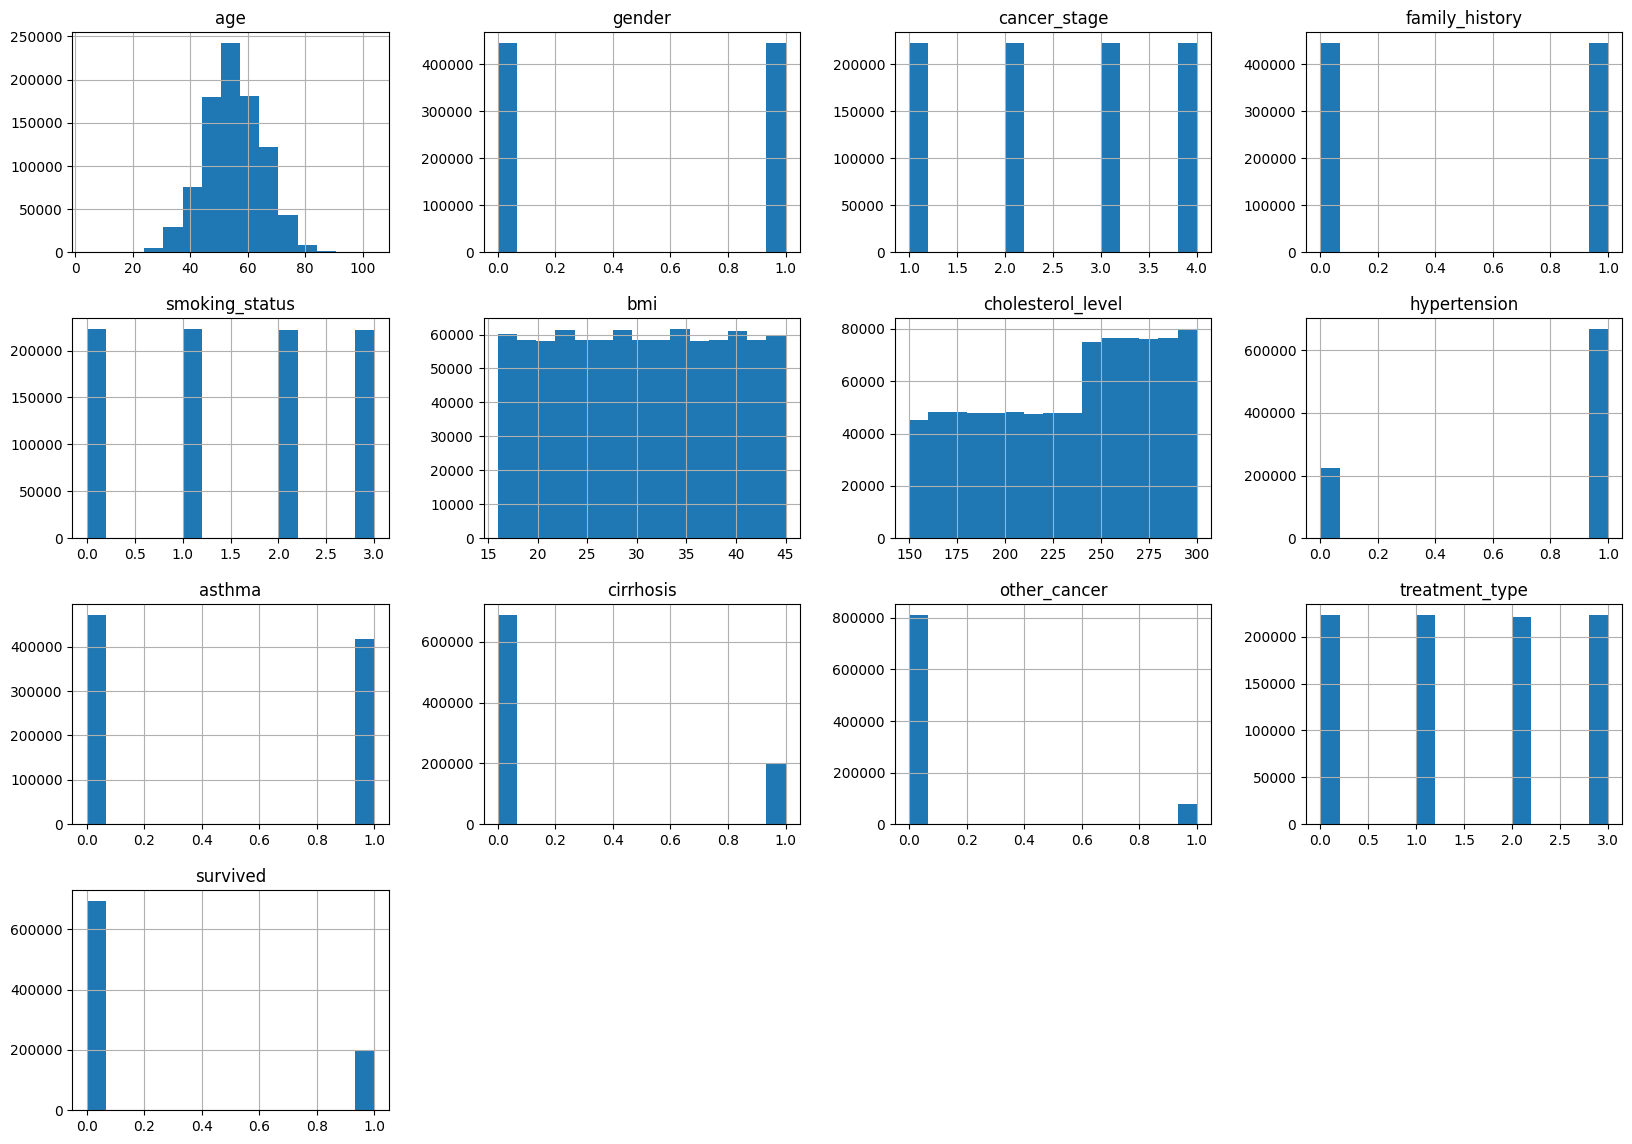

In [13]:
# Plot histograms for all columns
datacan.hist(figsize=(20, 14), bins= 15)
plt.show()

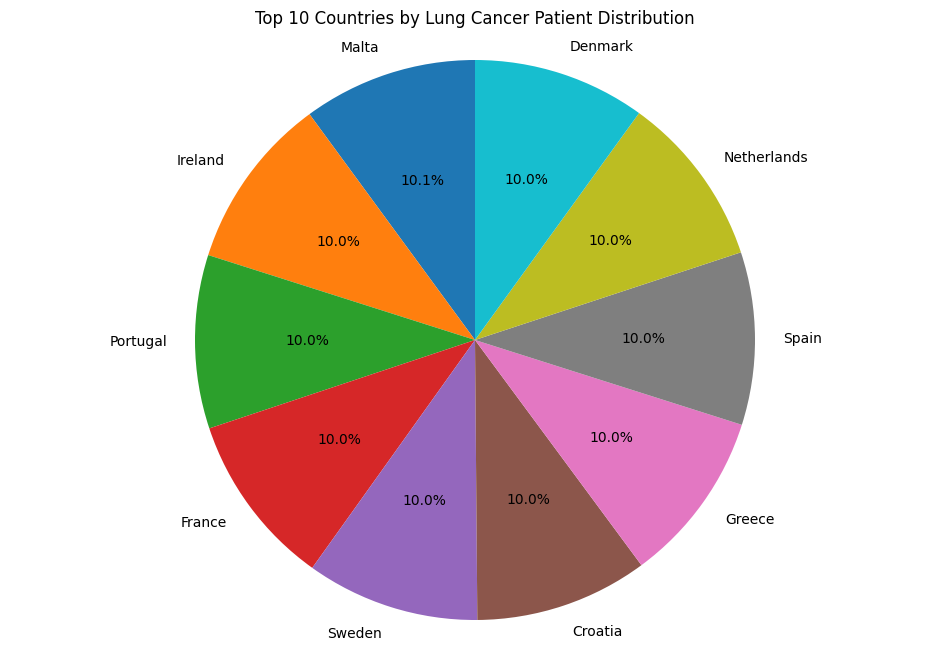

Top 10 countries:
country
Malta          33367
Ireland        33243
Portugal       33208
France         33199
Sweden         33161
Croatia        33138
Greece         33052
Spain          33042
Netherlands    33040
Denmark        33024
Name: count, dtype: int64


In [14]:
# Country distribution pie chart
country_counts = datacan['country'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by Lung Cancer Patient Distribution')
plt.axis('equal')
plt.show()

print("Top 10 countries:")
print(country_counts)

In [15]:
# delete the information str  and i dont need that
for xy in ['end_treatment_date', 'diagnosis_date', 'country']:
    if xy in datacan.columns:
        datacan.drop(columns=xy, inplace=True)

In [16]:
#show the table after edit
print(datacan.head())
print(datacan.describe(include='all'))
print(datacan.info())

    age  gender  cancer_stage  family_history  smoking_status   bmi  \
0  64.0       1             1               1               1  29.4   
1  50.0       0             3               1               1  41.2   
2  65.0       0             3               1               2  44.0   
3  51.0       0             1               0               1  43.0   
4  37.0       1             1               0               1  19.7   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                199             0       0          1             0   
1                280             1       1          0             0   
2                268             1       1          0             0   
3                241             1       1          0             0   
4                178             0       0          0             0   

   treatment_type  survived  
0               0         0  
1               1         1  
2               3         0  
3               0         

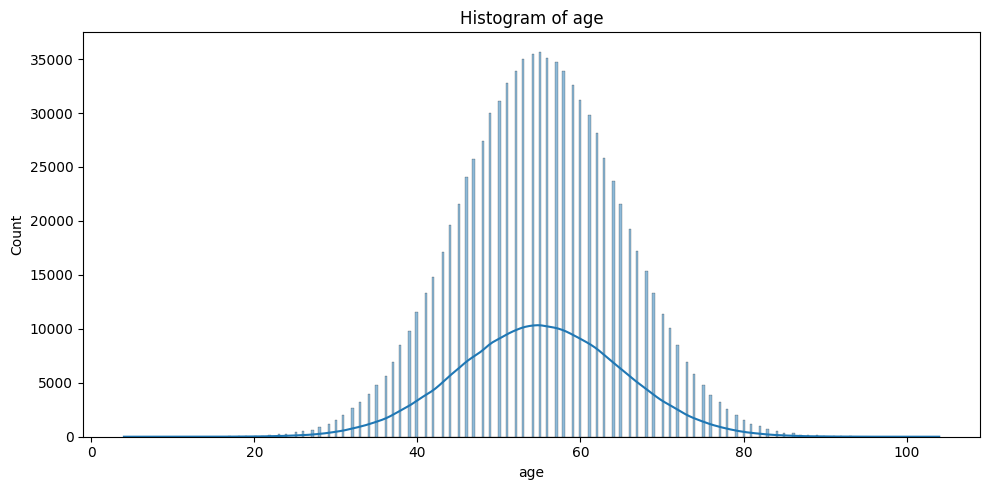

In [17]:
#show th graph before remove thing neednt that and what i will do the data

plt.figure(figsize=(10, 5))
sns.histplot(datacan['age'],kde = True)
plt.title("Histogram of age")
plt.xlabel('age')
plt.ylabel("Count")
plt.tight_layout()
plt.show()

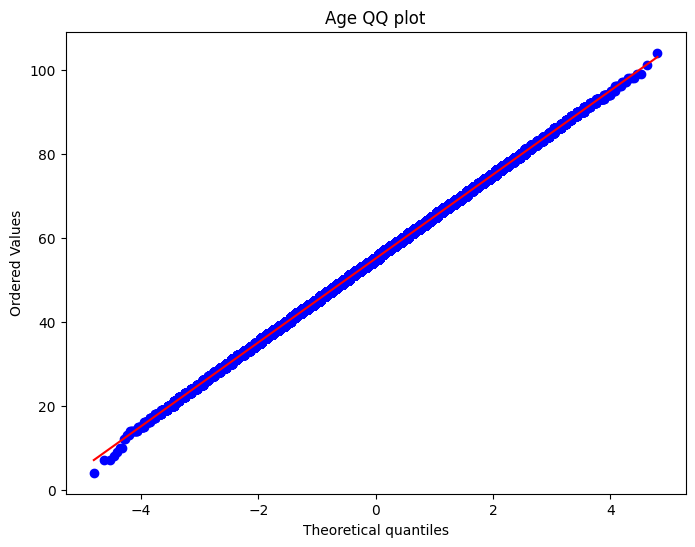

In [18]:
#Age Distribution
from scipy import stats

plt.figure(figsize=(8,6))
stats.probplot(datacan['age'], dist ='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

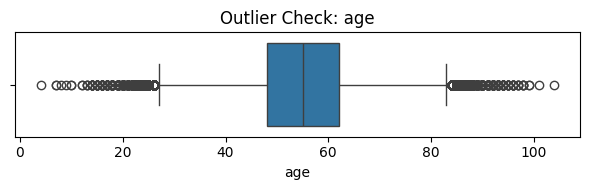

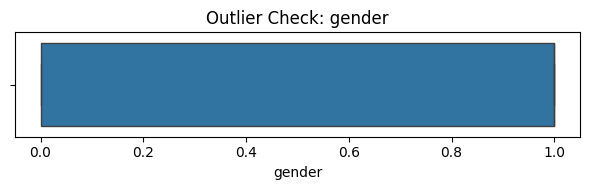

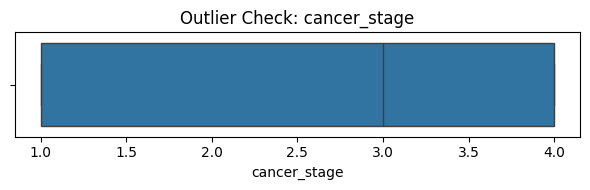

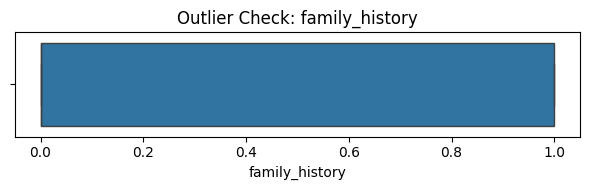

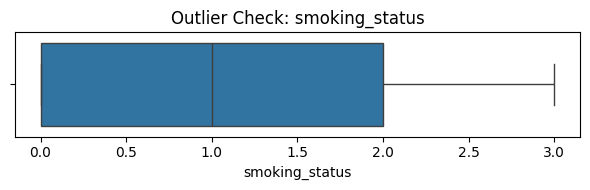

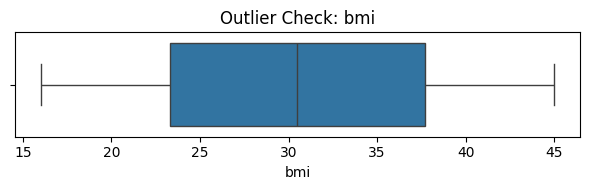

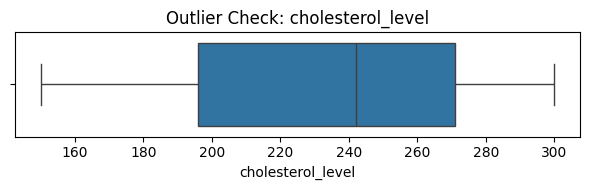

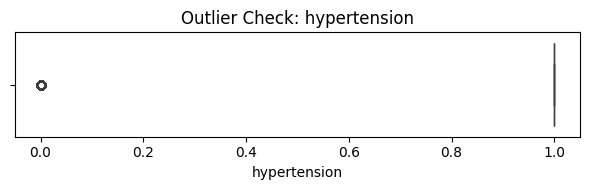

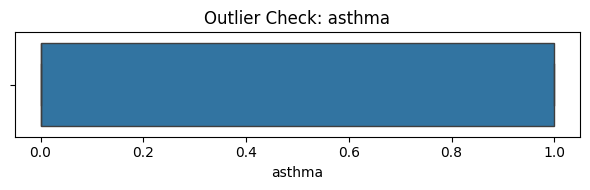

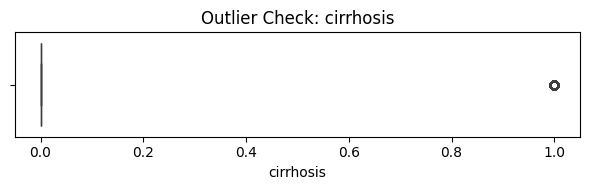

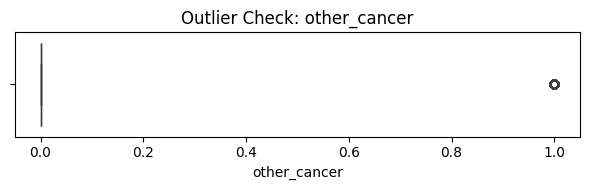

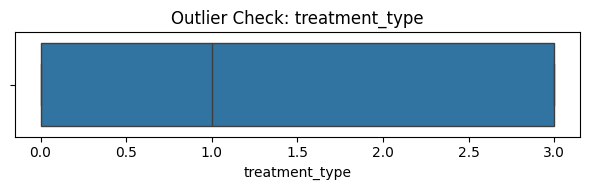

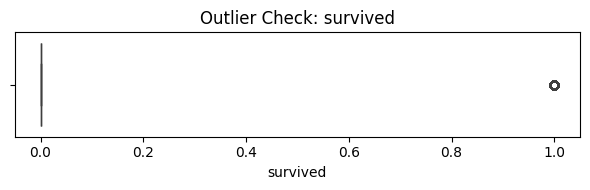

In [19]:
#show boxplot
for col in datacan:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=datacan, x=col)
    plt.title(f"Outlier Check: {col}")
    plt.tight_layout()
    plt.show()

In [20]:
# to remove outliers in columns age
datacan = datacan[(datacan['age'] >= 25) & (datacan['age'] <= 85)]


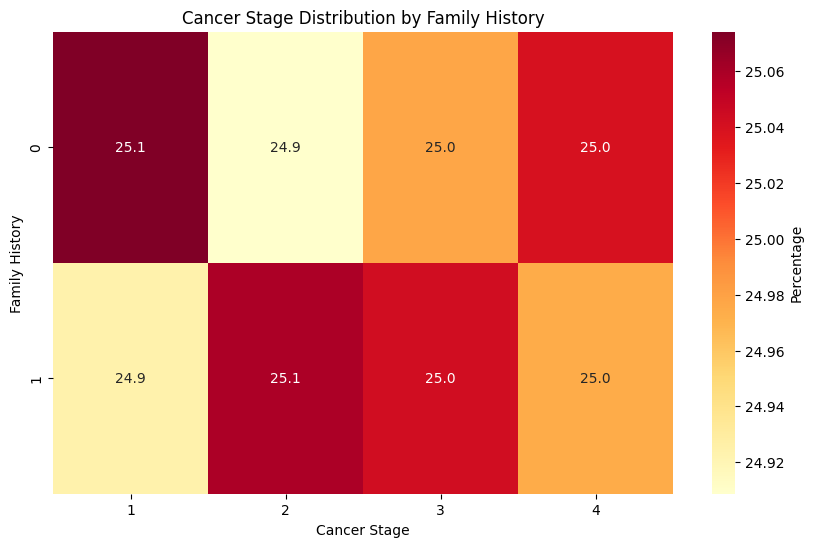

In [21]:
# Family history vs cancer stage heatmap
family_stage_crosstab = pd.crosstab(datacan['family_history'], datacan['cancer_stage'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(family_stage_crosstab, annot=True, cmap='YlOrRd', fmt='.1f',
            cbar_kws={'label': 'Percentage'})
plt.title('Cancer Stage Distribution by Family History')
plt.xlabel('Cancer Stage')
plt.ylabel('Family History')
plt.show()


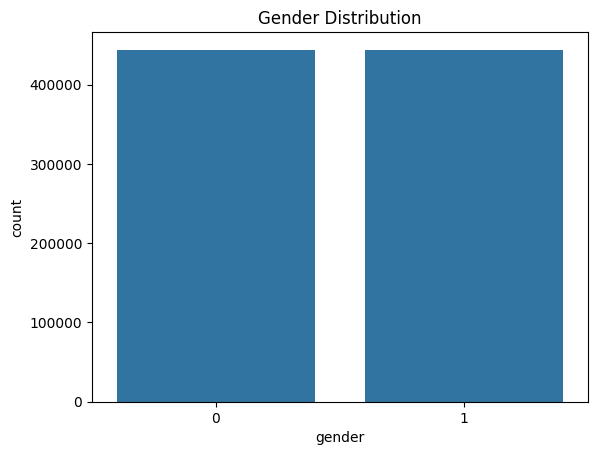

In [22]:
# mean radius distribution plot
sns.countplot(x='gender', data=datacan)
plt.title('Gender Distribution')
plt.show()

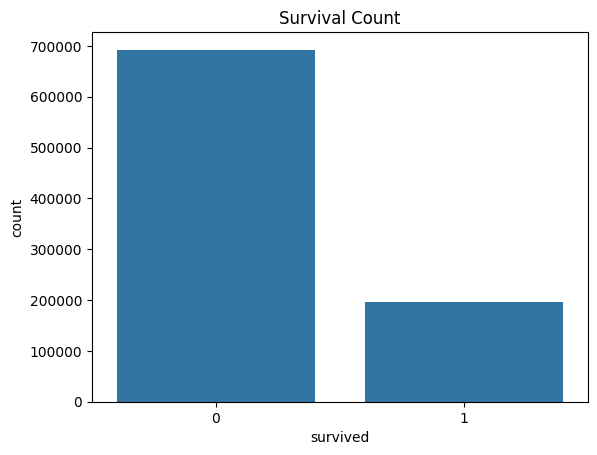

In [23]:
#check target variable balance

sns.countplot(x = 'survived',data = datacan)
plt.title('Survival Count')
plt.show()

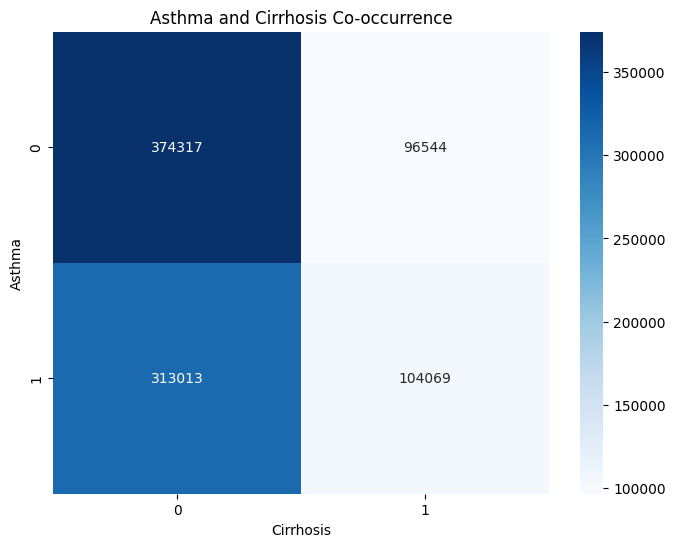

cirrhosis       0       1
asthma                   
0          374317   96544
1          313013  104069


In [24]:
asthma_cirrhosis = pd.crosstab(datacan['asthma'], datacan['cirrhosis'])

plt.figure(figsize=(8, 6))
sns.heatmap(asthma_cirrhosis, annot=True, cmap='Blues', fmt='d')
plt.title('Asthma and Cirrhosis Co-occurrence')
plt.xlabel('Cirrhosis')
plt.ylabel('Asthma')
plt.show()

print(asthma_cirrhosis)

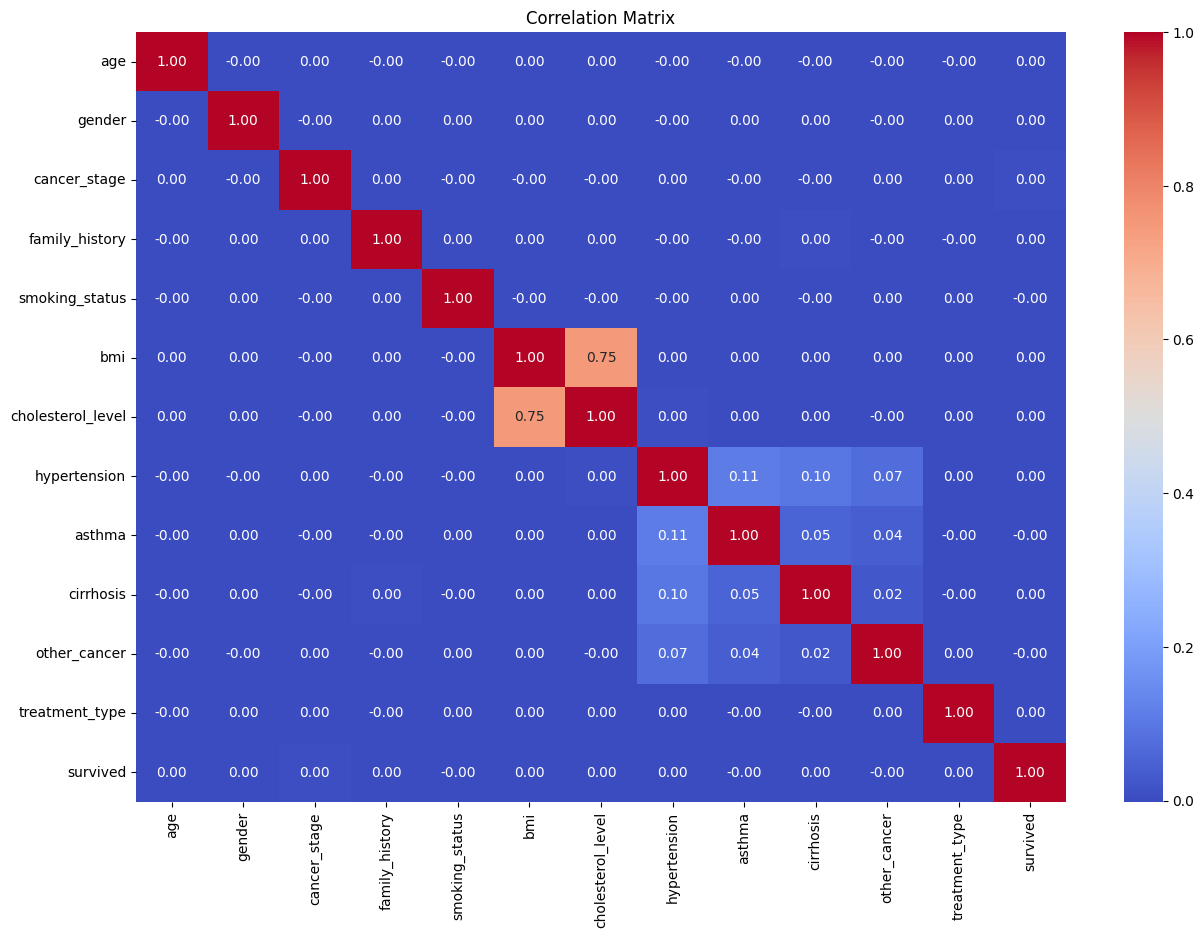

In [25]:
# correlation matrix
correlation_matrix = datacan.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
#analyzes survival by gender
print(datacan['gender'].value_counts())
print(datacan.groupby('gender')['survived'].value_counts())

# Survival rate by gender
print(datacan.groupby('gender')['survived'].mean())


gender
1    444135
0    443808
Name: count, dtype: int64
gender  survived
0       0           346232
        1            97576
1       0           346163
        1            97972
Name: count, dtype: int64
gender
0    0.219861
1    0.220591
Name: survived, dtype: float64


In [27]:
# Target and features

x = datacan.drop("survived", axis=1)
y = datacan["survived"]

In [28]:
# Split to train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [29]:
# Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [30]:
# Create a Logistic Regression model

logistic_model = LogisticRegression(
                                     max_iter=500,
                                     penalty='l2',
                                     C=2.0,
                                     solver='lbfgs',
                                     random_state=42
                                     )


logistic_model.fit(x_train_scaled, y_train)

# predictions
y_pred_log = logistic_model.predict(x_test_scaled)

# Evaluate model accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive']
)

print("\nConfusion Matrix:\n", conf_matrix_df)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 77.99%

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative              138495                   0
Actual Positive               39094                   0

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138495
           1       0.00      0.00      0.00     39094

    accuracy                           0.78    177589
   macro avg       0.39      0.50      0.44    177589
weighted avg       0.61      0.78      0.68    177589



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# Create a Decision Tree Classifier

datacan = DecisionTreeClassifier(

    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features=14,

)

# Train the model
datacan.fit(x_train, y_train)

# predictions
y_pred_dt = datacan.predict(x_test)

print(f"Train Accuracy: {datacan.score(x_train, y_train):.2%}")
print(f"Test Accuracy: {datacan.score(x_test, y_test):.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive']
)
print("\nConfusion Matrix:\n", conf_matrix_df)


Train Accuracy: 83.45%
Test Accuracy: 71.52%

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative              122402               16093
Actual Positive               34487                4607


In [32]:
# Create a Knn model

knn_model = KNeighborsClassifier(
                                  n_neighbors=5,
                                  n_jobs=-1
                                  )

# train
knn_model.fit(x_train, y_train)

# predictions
y_pred_knn = knn_model.predict(x_train)
y_pred_test = knn_model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train, y_pred_knn):.4f}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive']
)

print("Confusion Matrix:\n", conf_matrix_df)

# classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Train Accuracy: 0.7982
Test Accuracy: 0.7379
Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative              128109               10386
Actual Positive               36155                2939

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85    138495
           1       0.22      0.08      0.11     39094

    accuracy                           0.74    177589
   macro avg       0.50      0.50      0.48    177589
weighted avg       0.66      0.74      0.68    177589



In [33]:
# Linear Regression model
model1 = LinearRegression()

# train
model1.fit(x_train, y_train)

# predictions
y_pred_lr = model1.predict(x_train)
y_pred_test = model1.predict(x_test)

# Evaluate model performance
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")


Test RMSE: 0.4143


In [34]:
# Create a Random Forest model

rf_model = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=35,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features='sqrt',
    n_jobs=-1
)

# train
rf_model.fit(x_train, y_train)

# predictions
y_pred_rf = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

print(f'Train Accuracy: {accuracy_score(y_train, y_pred_rf):.4f}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}')


Train Accuracy: 0.7801
Test Accuracy: 0.7799


In [35]:
# Create a XGBoost model

xgb = XGBClassifier()

xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2%}")


XGBoost Accuracy: 77.98%


In [38]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [41]:
# Save trained models
import pickle

for name, model in models.items():
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

In [48]:
# save the new values after that remove the text
#datacan.to_csv('Lung Cancer.csv')